<div class = "alert alert-info"> <h1 align = center> REGRESSION </h1>
</div>

In [13]:
# Importing libraries 

library(MASS)
library(ISLR)

# Setting plot options

options(repr.plot.width = 4, repr.plot.height = 3, repr.plot.res = 130)

<font color = red> <h3> 1 - Simple linear regression </h3> </font>

We are going to use the Boston dataset from the MASS library. Now let's explore this dataset. 

In [4]:
# The names of the variables of the dataset
names(Boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

In [5]:
# The documentation of the dataset
?Boston

Boston {MASS},R Documentation


 We will plot the waviable `medv` and `lstat` to see if there is any apparent relationship between these variables.

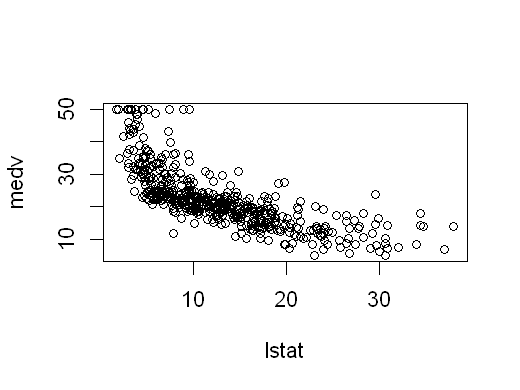

In [14]:
plot(medv ~ lstat, Boston)

We can see that as the lower status in the region percentage increases the median housing value decreases.  


We will fit a linear model now to those data. 

In [7]:
# the linear model 
fit1 <- lm(medv ~ lstat, data = Boston)
fit1


Call:
lm(formula = medv ~ lstat, data = Boston)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  


We can see that the coefficient of the variable lstat is negative as we have a negative relationship between those variables.

In [8]:
# We use the summary function to get more information about our model

summary(fit1)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


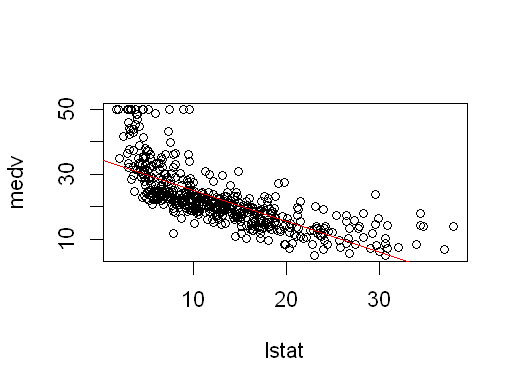

In [16]:
# adding a regression line from our model to the scatter plot
plot(medv ~ lstat, Boston)
abline(fit1, col = "red")

In [17]:
# we can see all the components of our generated model 

names(fit1)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [18]:
# the 95% confidence interval of the estimated parameters of the model

confint(fit1)

,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505


In [20]:
# We can also predict the 95% confidence interval of medv for some new values of lstat

predict(fit1, data.frame(lstat = c(5, 10, 15)), interval = "confidence")

fit,lwr,upr
29.80359,29.00741,30.59978
25.05335,24.47413,25.63256
20.30310,19.73159,20.87461


<font color = red> <h3> 2 - Multiple linear regression </h3> </font>

Now we will fit another linear model `fit2` with lstat and age. 

In [21]:
# multiple linear regression model 

fit2 <- lm(medv ~ lstat + age, data = Boston)
summary(fit2)


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


We can see that the variable `age` is significant but not as significant as the variable `lstat`.

Also the R-squared which is the percentage of variance explained is higher for this new model than for the previous one.

In [22]:
# Let's look another multiple linear regression model with all the other variables as predictors

fit3 <- lm(medv ~ ., data = Boston)
summary(fit3)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

This new model has a higher R-squared than the two previous one. We can see that here the variable age is no longer significant. This can be explained by the fact that many other predictors are very correlated to age and in their presence age is no longer required.   

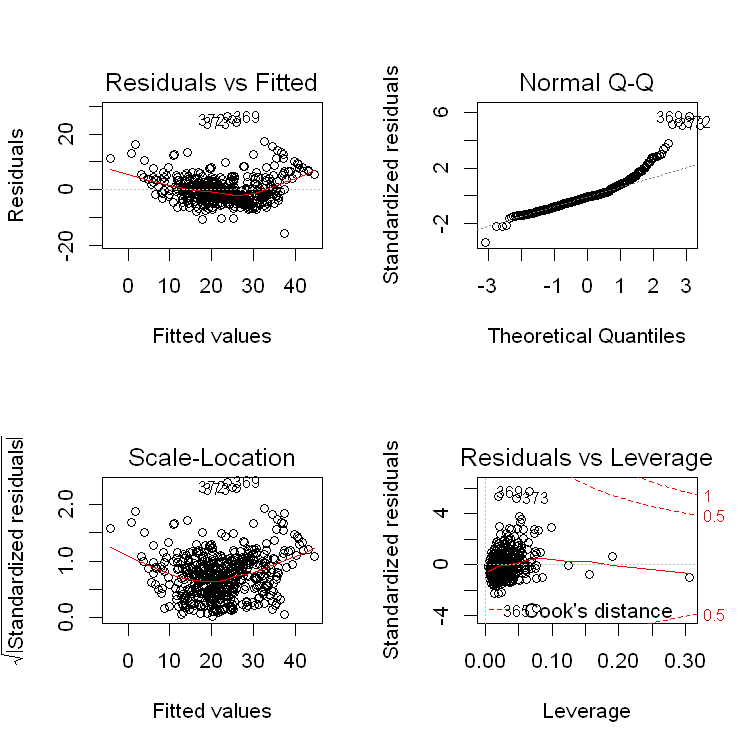

In [28]:
# Let's plot some important result of our model 
options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 150)
par(mfrow = c(2, 2))
plot(fit3)

In [31]:
# We can also update our previous model by removing the non significant predictors

fit4 <- update(fit3, ~ . - age - indus)
summary(fit4)


Call:
lm(formula = medv ~ crim + zn + chas + nox + rm + dis + rad + 
    tax + ptratio + black + lstat, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.5984  -2.7386  -0.5046   1.7273  26.2373 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.341145   5.067492   7.171 2.73e-12 ***
crim         -0.108413   0.032779  -3.307 0.001010 ** 
zn            0.045845   0.013523   3.390 0.000754 ***
chas          2.718716   0.854240   3.183 0.001551 ** 
nox         -17.376023   3.535243  -4.915 1.21e-06 ***
rm            3.801579   0.406316   9.356  < 2e-16 ***
dis          -1.492711   0.185731  -8.037 6.84e-15 ***
rad           0.299608   0.063402   4.726 3.00e-06 ***
tax          -0.011778   0.003372  -3.493 0.000521 ***
ptratio      -0.946525   0.129066  -7.334 9.24e-13 ***
black         0.009291   0.002674   3.475 0.000557 ***
lstat        -0.522553   0.047424 -11.019  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*

We can see that now all our predictors are significant. 

<font color = red> <h3> 3 - Nonlinear terms and Interactions </h3> </font>

Let's fit a model by putting and interaction between lstat and age. 

In [33]:
fit5 <- lm(medv ~ lstat * age, Boston)
summary(fit5)


Call:
lm(formula = medv ~ lstat * age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.806  -4.045  -1.333   2.085  27.552 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.0885359  1.4698355  24.553  < 2e-16 ***
lstat       -1.3921168  0.1674555  -8.313 8.78e-16 ***
age         -0.0007209  0.0198792  -0.036   0.9711    
lstat:age    0.0041560  0.0018518   2.244   0.0252 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.149 on 502 degrees of freedom
Multiple R-squared:  0.5557,	Adjusted R-squared:  0.5531 
F-statistic: 209.3 on 3 and 502 DF,  p-value: < 2.2e-16


We can see that in this model the effect of `age` is not significant while the effect of the interaction is somewhat significant. 

Now we will introduce a quadratic term in the model.

In [34]:
fit6 <- lm(medv ~ lstat + I(lstat^2), Boston)
summary(fit6)


Call:
lm(formula = medv ~ lstat + I(lstat^2), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


Here we can see that all our estimated parameters are highly significant, even the quadratic term. 

Now let's attach our dataset to make some plot easily. 

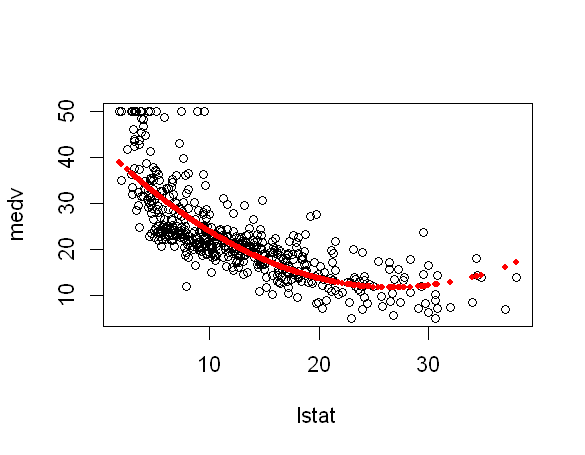

In [45]:
# attach the data
attach(Boston)
# make the scatter plot 
options(repr.plot.width = 4.5, repr.plot.height = 3.5, repr.plot.res = 130, warn = -1)
par(mfrow = c(1, 1))
plot(medv ~ lstat)
# put the quadratic model on the scatter plot
points(lstat, fitted(fit6), col = "red", pch = 20)

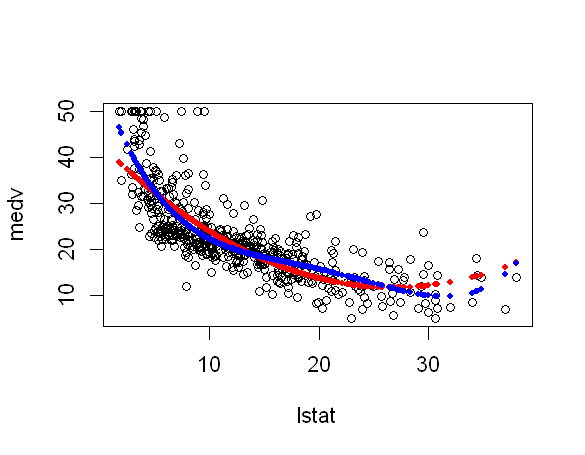

In [46]:
# Fitting our model with polynomials 
fit7 <- lm(medv ~ poly(lstat, 4))
# Adding the new model to the previous plot 
par(mfrow = c(1, 1))
plot(medv ~ lstat)
points(lstat, fitted(fit6), col = "red", pch = 20)
points(lstat, fitted(fit7), col = "blue", pch = 20)

<font color = red> <h3> 4 - Qualitative predictors </h3> </font>